<a href="https://colab.research.google.com/github/Tamilmani-DS/Customer_Conversion-_Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Import Libraries And Load Dataset

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
# There are many types of data insert option.In that i use google drive option
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
data.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


#2) Data Cleaning

In [ ]:
data.shape

(45211, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
data.duplicated().sum()

6

In [ ]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


#3) Exploratory Data Analysis

In [ ]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
data.groupby("y").count()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
y,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


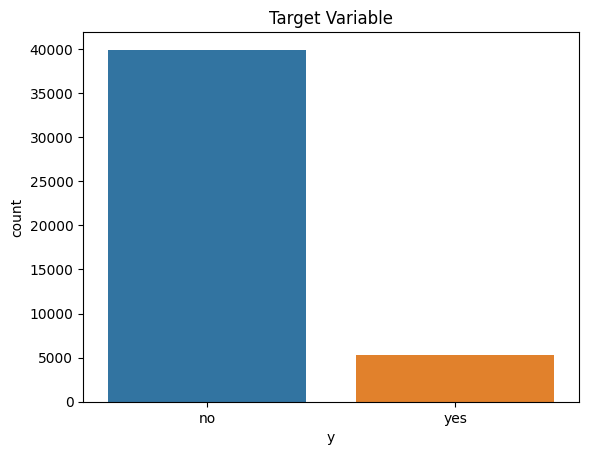

In [ ]:
# Target variable visualization
sns.countplot(x="y", data = data)
plt.title("Target Variable")
plt.show()

In [ ]:
# percentage of class present in target variable(y)
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)

percentage of NO and YES
 no     88.30152
yes    11.69848
Name: y, dtype: float64


The class distribution in the target variable is - 88:12. So, this is imbalance dataset.

Categorical Variable Visualization

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


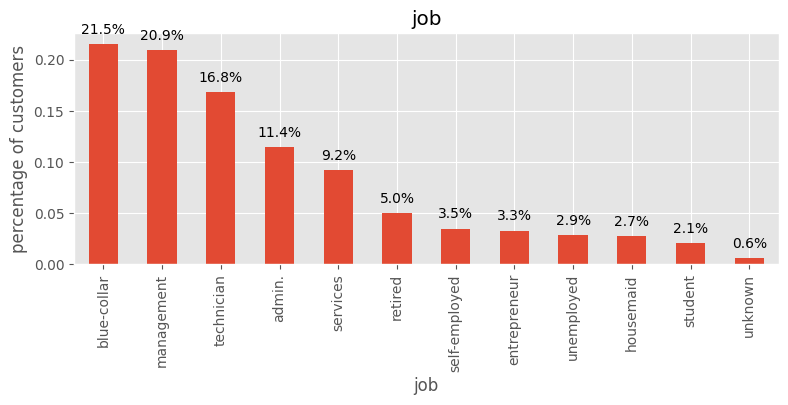

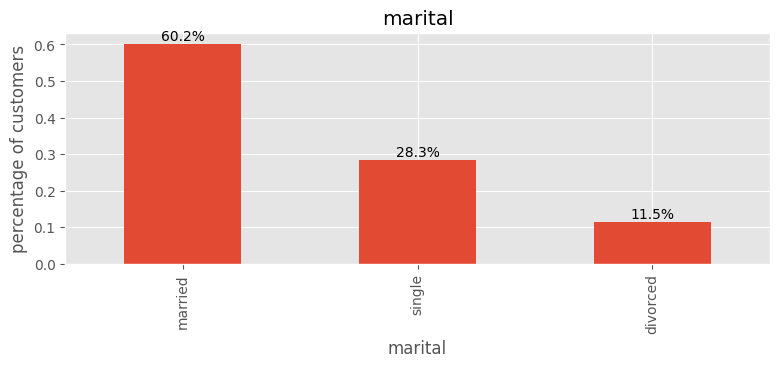

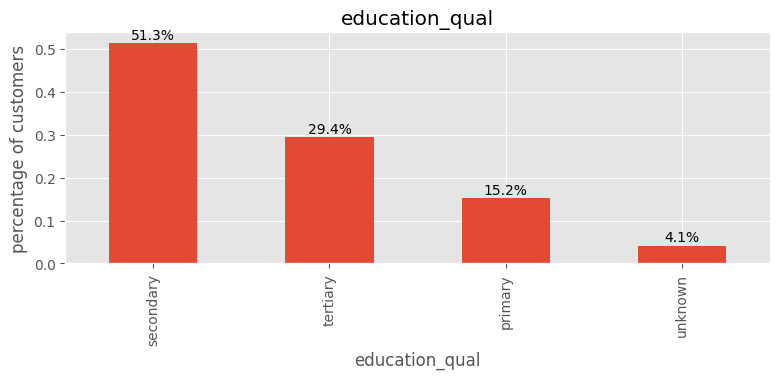

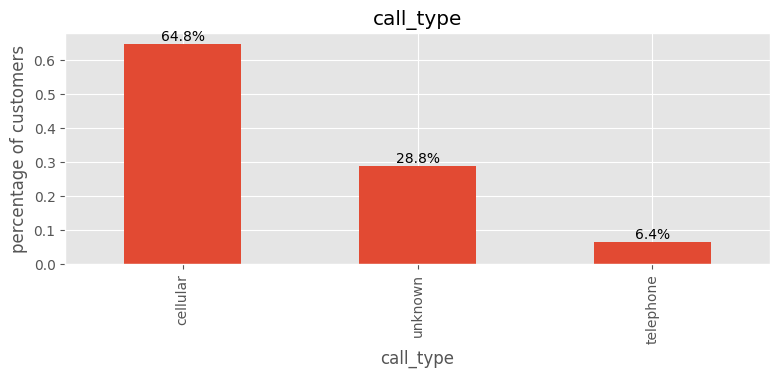

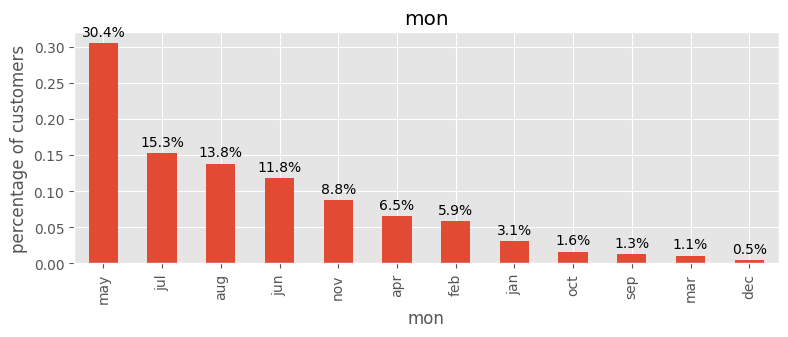

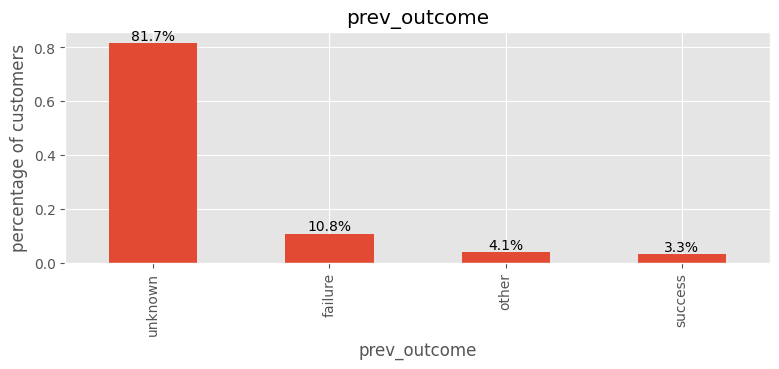

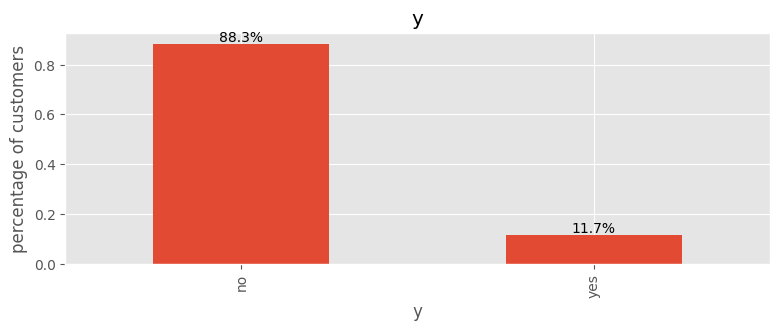

In [ ]:
# indentifying the categorical variables
categ_var= data.select_dtypes(include= ["object"]).columns
print(categ_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in categ_var:
    plt.figure(figsize=(20,3))
    ax = plt.subplot(122)
    data[column].value_counts(normalize=True).plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("percentage of customers")
    plt.title(column)

    # Add percentage labels to the top of each bar
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.01, f"{p.get_height()*100:.1f}%", ha="center")

Observations :

The top three professions that our customers belong to are -Management ,
blue-collar jobs and technicians.

A huge number of the customers are married.

Cellular type is most used by customers.

Many customers have been contacted in the month of May.

Very less number of customers are there who succeessfully converted previously

Most of customers are belong to secondary education qualification

The plot for the target variable shows heavy imbalance in the target variable.

The missing values in some columns have been represented as unknown. unknown represents missing data.

In [ ]:
cate_var=['job','education_qual']
for column in cate_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

Numerical Variable Visualization

In [ ]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1


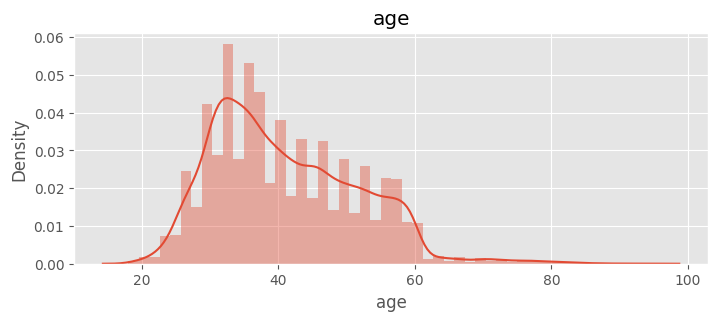

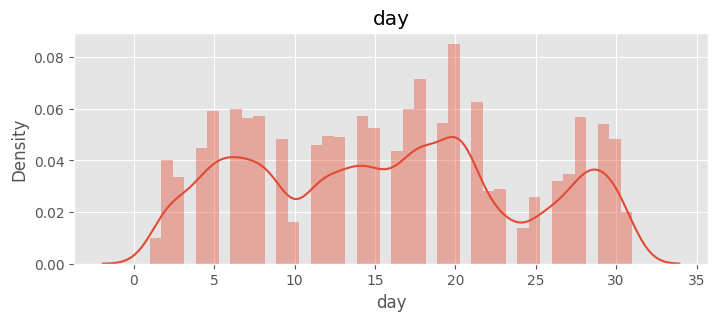

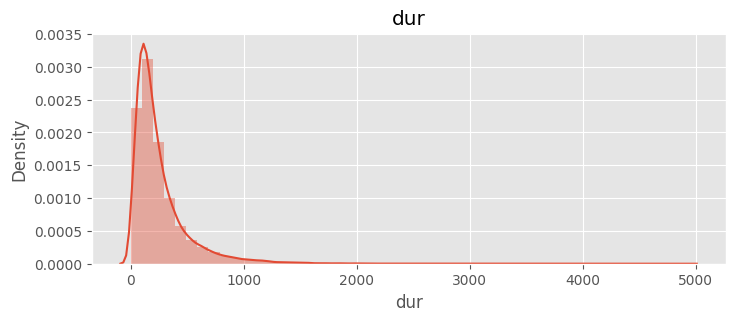

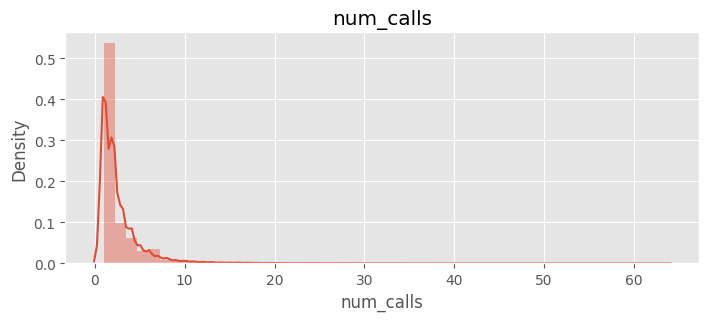

In [ ]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "day", "dur",'num_calls']:
    plt.figure(figsize=(18,3))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

Observation :

As we can see from the histogram, the features age, dur and num_calls are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.

Looking at the plot for num_calls, we can infer that majority of the customers were being contacted for the first or second time.

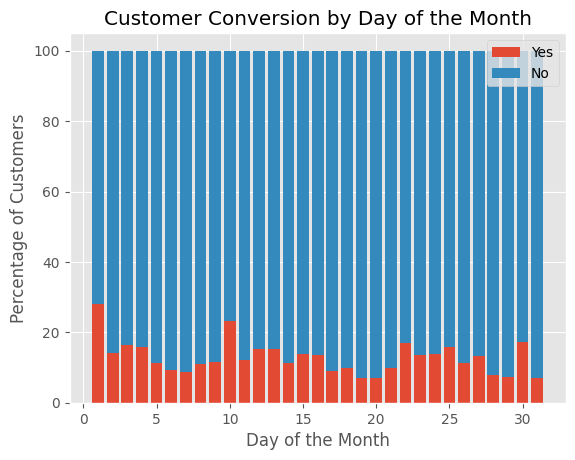

In [ ]:
day_counts = data.groupby('day')['y'].value_counts(normalize=True) * 100
yes_counts = day_counts[:, 'yes']
no_counts = day_counts[:, 'no']

plt.bar(day_counts.index.levels[0], yes_counts, label='Yes')
plt.bar(day_counts.index.levels[0], no_counts, bottom=yes_counts, label='No')
plt.xlabel('Day of the Month')
plt.ylabel('Percentage of Customers')
plt.title('Customer Conversion by Day of the Month')
plt.legend()
plt.show()

Observation:

from above plot we can see 1,10,30 dates are when customer said yes most.

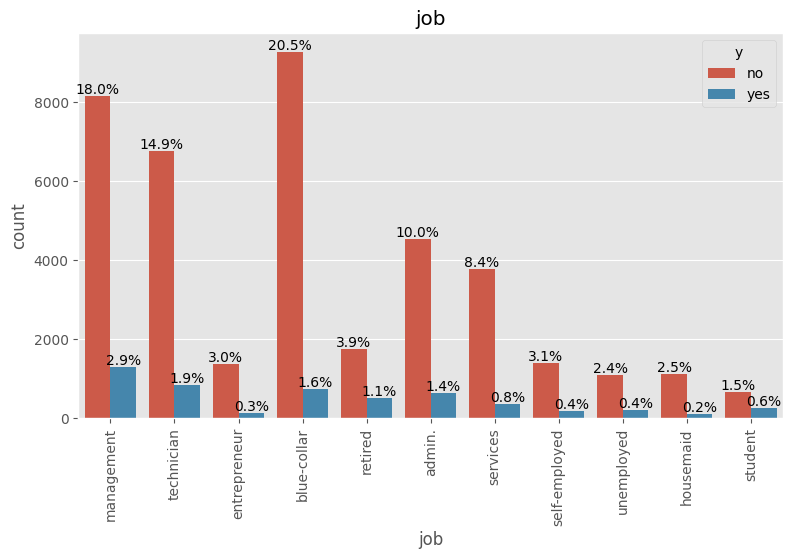

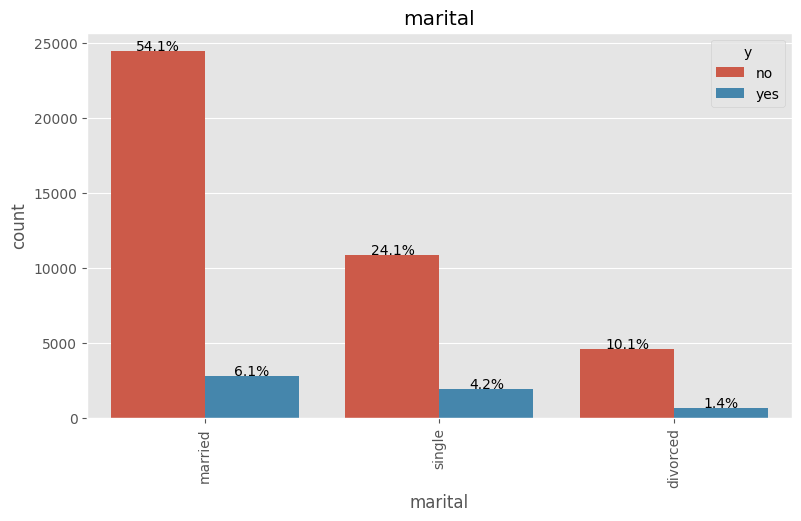

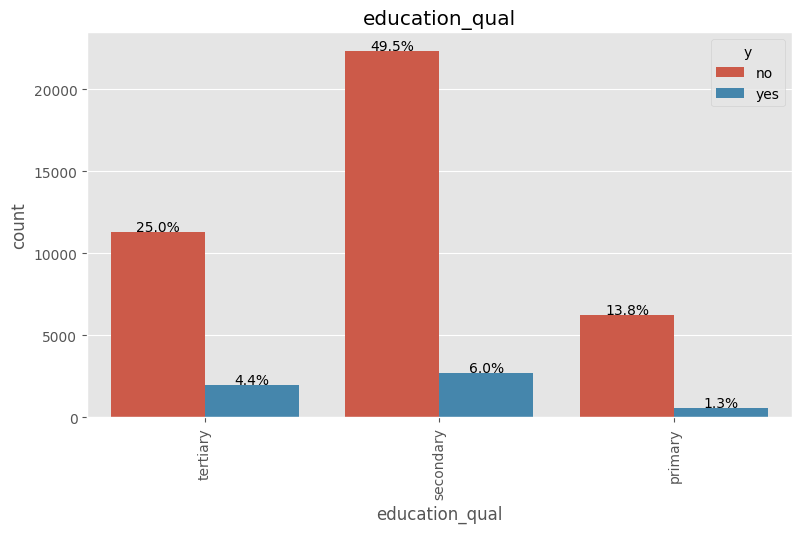

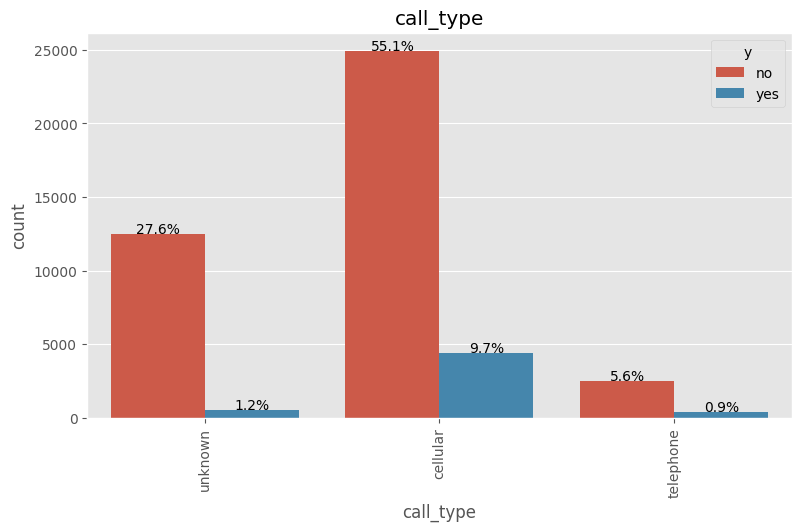

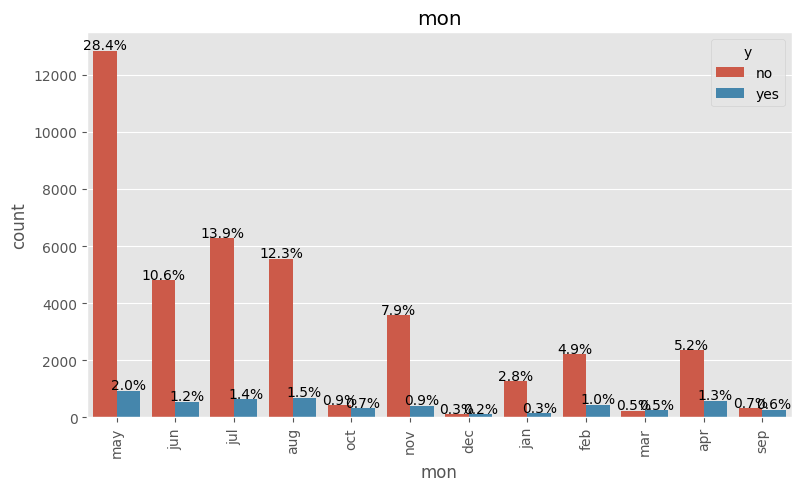

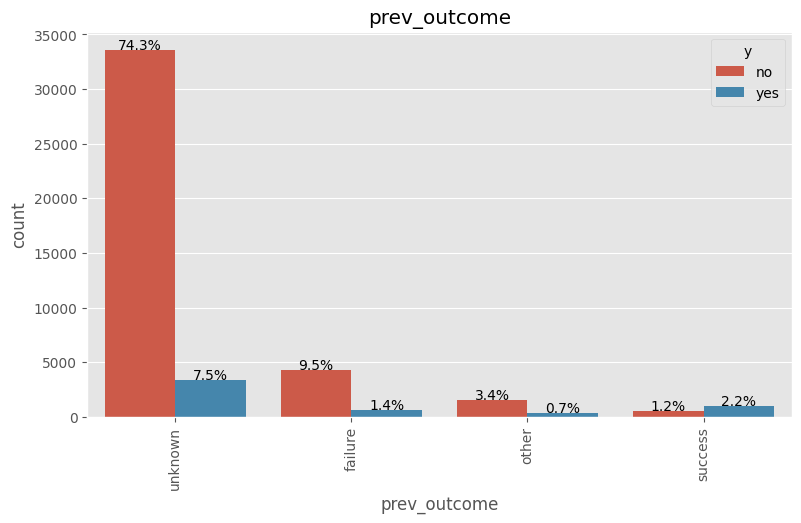

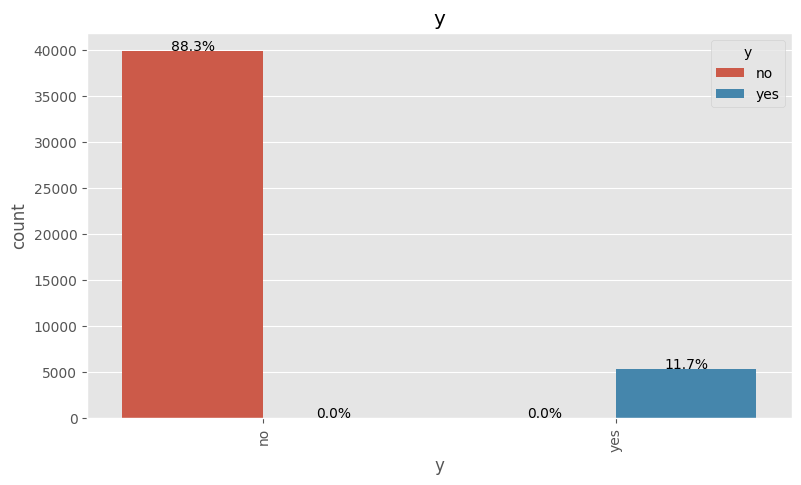

In [ ]:
plt.style.use("ggplot")
for column in categ_var:
    plt.figure(figsize=(20,5))
    ax = plt.subplot(121)
    sns.countplot(x=column, hue="y", data=data)
    plt.title(column)
    plt.xticks(rotation=90)

    # Add percentage labels to the top of each bar
    for p in ax.patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])
        ax.text(p.get_x()+p.get_width()/2., height+50, f"{height/total*100:.1f}%", ha="center")

    plt.show()

Observations:

1.Customers having management jobs form the majority amongst those who have converted most.

2.married most of them converted

3.secondary education qualfied are converted most

4.Cell-phones should be the preferred mode of contact for contacting customers.

5.may month should be the prefered month to contact

 # Outlier Detaction

Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers.

In [ ]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
# compute interquantile range to calculate the borders
lower_borders= []
upper_borders= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_border= data[i].quantile(0.25) - (1.5*IQR)
    upper_border= data[i].quantile(0.75) + (1.5*IQR)

    print(i, ":", lower_border, ",",  upper_border)

    lower_borders.append(lower_border)
    upper_borders.append(upper_border)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


In [ ]:
# replace the all the outliers which is greater then upper border by upper border
j = 0
for i in ["age", "dur", "day","num_calls"]:
    data.loc[data[i] > upper_borders[j], i] = int(upper_borders[j])
    j = j + 1

Since,

for age the lower border (10.5) < minimum value (18) for dur num_calls and day the lower borders are negative (-221.0), (-11.0),(-2.0) resp. replacing outliers with the lower border is not required.

In [ ]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.862799,15.806419,234.939307,2.392228
std,10.379659,8.322476,176.749932,1.600111
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,70.000000,31.000000,643.000000,6.000000


After replacing the outliers with the upper border, the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles.

# 4) Encoding Categorical Features

In [ ]:
#'y'  target variable
data.replace({'y' : { 'yes' : 1, 'no' : 0}},inplace=True)

<Axes: >

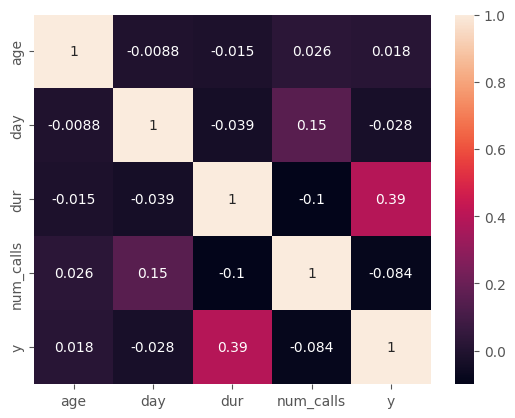

In [ ]:
#plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


In [ ]:
for i in cat_var:
    print(i, ":", data[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']


In [ ]:
#Months column
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

data['mon'] = data['mon'].apply(
    lambda x: months.index(x)+1
)

In [ ]:
#'education_qual'
data.replace({'education_qual' : { 'tertiary' : 1, 'secondary' : 2, 'primary' : 3 }},inplace=True)

In [ ]:
def encoding_data(data,col):
  for i in col:
     data_dummies = pd.get_dummies(data[i], prefix=i)
     data = pd.concat([data, data_dummies], axis=1)
     data.drop([i],inplace=True,axis=1)
  return data

In [ ]:
columns=['call_type','prev_outcome','marital','job']
data =encoding_data(data,columns)

In [ ]:
data.head(10)

,age,education_qual,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,1,5,5,261,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,44,2,5,5,151,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,33,2,5,5,76,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,47,2,5,5,92,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,33,2,5,5,198,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,35,1,5,5,139,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,28,1,5,5,217,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,42,1,5,5,380,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8,58,3,5,5,50,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,43,2,5,5,55,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# 5) Split Dataset

In [ ]:
p= data.drop(['y'],axis=1)
q= data['y']

In [ ]:
# SMOTE Oversampling we are using due to imbalence data
# Define the SMOTETomek object with a 0.75 sampling strategy
smote_tomek = SMOTETomek(sampling_strategy=0.75)

# Apply SMOTETomek oversampling to the training data
X, y = smote_tomek.fit_resample(p, q)

# Check the class distribution of the resampled data
print(y.value_counts())

0    39484
1    29503
Name: y, dtype: int64


In [ ]:
# Splitting resampled data in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

# 6) Scaling

In [ ]:
# Scalling Dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7) All Classification Models

1.Logistic Regression

In [ ]:
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train, y_train)
LR_predicted=LR_model.predict(X_test)
conf = confusion_matrix(y_test, LR_predicted)
print()

#Evaluation of the model
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, LR_predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, LR_model.predict_proba(X_test)[:,1]))
log_reg_y_pred_proba = LR_model.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_proba)


The accuracy of Logistic Regression is :  92.21143160844566 %
The aurroc_auc_score of Logistic Regression is :  0.9761332590690751


2.K - Nearest Neighbor

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predicted = KNN.predict(X_test)
print()

#Evaluation of the model
print("The Accuracy  of K N Neighbors is : ",accuracy_score(y_test, KNN_predicted)*100, "%")
K_AUC_ROC = roc_auc_score(y_test, KNN_predicted)
print("The AUCROC_auc_Score of K Neighbors is : ",(K_AUC_ROC))
KNN_y_pred_proba = KNN.predict_proba(X_test)[:, 1]
KNN_auc = roc_auc_score(y_test, KNN_y_pred_proba)


The Accuracy  of K N Neighbors is :  92.71391989177175 %
The AUCROC_auc_Score of K Neighbors is :  0.9222563843918623


3.Decision Tree

In [ ]:
DTC_model = DecisionTreeClassifier(random_state=0, )
DTC_model.fit(X_train, y_train)
DT_predicted = DTC_model.predict(X_test)
print()

#Evaluation of the model
print("Accuracy Score of Decision Tree is :",accuracy_score(y_test, DT_predicted)*100,"%" )
DT_AUC_ROC = roc_auc_score(y_test, DT_predicted)
print("THE AUCROC_auc_Score of Decision Tree is:",DT_AUC_ROC)
DT_y_pred_proba = DTC_model.predict_proba(X_test)[:,1]
DT_auc = roc_auc_score(y_test,DT_y_pred_proba)


Accuracy Score of Decision Tree is : 91.16780209692226 %
THE AUCROC_auc_Score of Decision Tree is: 0.9113270096099569


4.Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
predicted = rf_model.predict(X_test)
print()
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
RF_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
RF_fpr, dt_tpr, _ = roc_curve(y_test, RF_y_pred_proba)
RF_auc = roc_auc_score(y_test, RF_y_pred_proba)


The accuracy of Random Forest is :  93.73822293085955 %
The aurroc_auc_score of  random forest is :  0.9867066681661527


5.XG Boost

In [ ]:
XGB_model = xgb.XGBClassifier(use_label_encoder=False)
XGB_model.fit(X_train, y_train)
xgb_predicted = XGB_model.predict(X_test)
print()

#Evaluation of the model
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, xgb_predicted)*100, "%")
print ("The AUCROC_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, XGB_model.predict_proba(X_test)[:, 1]))
XGB_y_pred_proba = XGB_model.predict_proba(X_test)[:, 1]
XGB_auc = roc_auc_score(y_test, XGB_y_pred_proba)


The accuracy of X Gradient Boosting is :  93.78170749383969 %
The AUCROC_auc_score of Gradient Boosting is :  0.9870319369522634


ROC Curve the all models

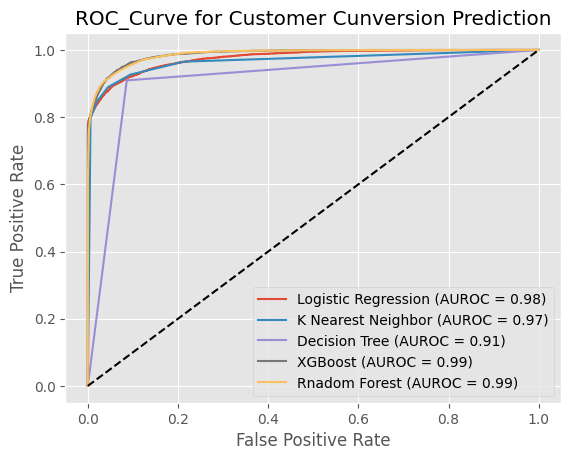

In [ ]:
log_reg_fpr, log_reg_tpr, thresholds = roc_curve(y_test, log_reg_y_pred_proba)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, KNN_y_pred_proba)
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT_y_pred_proba)
XGB_fpr, XGB_tpr, thresholds = roc_curve(y_test, XGB_y_pred_prob)
RF_fpr, RF_tpr, thresholds = roc_curve(y_test, RF_y_pred_prob)


plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUROC = {log_reg_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'K Nearest Neighbor (AUROC = {KNN_auc:.2f})')
plt.plot(DT_fpr, DT_tpr, label =f"Decision Tree (AUROC = {DT_auc:.2f})")
plt.plot(XGB_fpr, XGB_tpr, label=f'XGBoost (AUROC = {XGB_auc:.2f})')
plt.plot(RF_fpr, RF_tpr, label=f'Rnadom Forest (AUROC = {RF_auc:.2f})' )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve for Customer Cunversion Prediction')
plt.legend()
plt.show()

# 8) Save The Model

In [ ]:
# Save the model
import pickle
filename = 'customer_conversion_model'
pickle.dump(XGB_model, open(filename, 'wb'))
customer_conversion_model = pickle.load(open('customer_conversion_model', 'rb'))

In [ ]:
# Open the model
with open("customer_conversion_model","rb") as files:
  model = pickle.load(files)

# 9) Find The Best Model

***Conculation***

1)Based on the results obtained from the evaluation of the five classification
  models (Logistic Regression, KNN, XGBoost, Decision Tree and Random Forest) on the given historical data, Random Forest outperformed the other models with the highest accuracy score of 93.91% and the highest AUROC score of 0.987.

  2)Decision Tree is Lowest accuracy score of 91.24 and AUROC score is 0.912

  3)So, Random Forest is a best model in Customer conversion prediction.This model for predicting whether a client will subscribe to the insurance or not.

  4)However, further analysis is recommended to identify the important features contributing to the model's performance and to fine-tune the model for better results.